# Acquisition Locations Assessment

The insights within the Zweig Group's 5 year Strategic Planning Assessment for Mcadams requires analysis and action to realize the company's 2027 goals. During this time period, Mcadams is targeting an increase in revenue from 60 million to 150 million dollars. Mcadams must keep growing to reach these targets, so finding good acquisition companies within growing and successful locations is a must. This analysis will provide information detailing the best locations in the country for further Mcadams branches.

## Objectives:
- Locate the places with the largest populations and fastest growing populations.
- Find the places with the best economies and markets for construction and civil engineering.
- Locate the states with the best and worst infrastructure scores.
- Locate the places that are most and least affected by climate change/disasters.
- Show how potential locations compare to to North Carolina and Texas.

## Data Sources:
- United States Census Bureau
- United States Bureau of Economic Analysis
- Federal Emergency Management Agency
- American Society of Civil Engineers
- US News

All the data is from reliable external locations and has been web scraped, downloaded, and cleaned for this analysis. The US News data was gathered from the Census Bureau.

In [1]:
#Import necessary libraries for the report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Population Analysis:

First, we import the population dataset.

In [79]:
#Import population data
population_data = pd.read_csv(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\population_df.csv")
population_data.drop('Unnamed: 0', axis=1, inplace=True)

Next, we will filter the data for state populations over 5.5 million people. It is necessary for acquistion locations to have large populations to ensure healthy economies and large construction markets.

In [78]:
#Filter data for large state populations
large = population_data['2021 Population'] >= 5500000
large_population = population_data[large]

More than half the states have been filtered out and only 22 states are left in the data. Next, we will sort the values by the 2021 population percent change. We will filter the top 10 results.

In [38]:
#Top 10 states with the highest population percent change in 2021. Sorted from highest to lowest.
high_recent_population_influx = large_population.sort_values(['2021 Population Percent Change'], ascending=[False]).head(10)
high_recent_population_influx

,State,2011 Population,2012 Population,2013 Population,2014 Population,2015 Population,2016 Population,2017 Population,2018 Population,2019 Population,...,2015 Population Percent Change,2016 Population Percent Change,2017 Population Percent Change,2018 Population Percent Change,2019 Population Percent Change,2020 Population Percent Change,2021 Population Percent Change,3 Year Average Percent Change,5 Year Average Percent Change,10 Year Average Percent Change
2,Arizona,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717,...,1.474843,1.631058,1.482999,1.618624,1.686122,-1.383911,1.369883,0.557364,0.954743,1.181056
43,Texas,25645629,26084481,26480266,26964333,27470056,27914410,28295273,28628666,28995881,...,1.875526,1.617594,1.364396,1.178264,1.282683,0.764840,1.061988,1.036504,1.130434,1.420185
9,Florida,19053237,19297822,19545621,19845911,20209042,20613477,20963613,21244317,21477737,...,1.829752,2.001258,1.698578,1.339006,1.098741,0.429258,0.979122,0.835707,1.108941,1.347984
33,North Carolina,9657592,9749476,9843336,9932887,10031646,10154788,10268233,10381615,10488084,...,0.994263,1.227535,1.117158,1.104202,1.025553,-0.294687,0.898761,0.543209,0.770197,0.889668
42,Tennessee,6399291,6453898,6494340,6541223,6591170,6646010,6708799,6771631,6829174,...,0.763573,0.832022,0.944762,0.936561,0.849766,1.331713,0.796215,0.992564,0.971803,0.865648
10,Georgia,9802431,9901430,9972479,10067278,10178447,10301890,10410330,10511131,10617423,...,1.104261,1.212788,1.052622,0.968279,1.011233,1.020747,0.687744,0.906574,0.948125,0.973579
5,Colorado,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736,...,1.878880,1.625355,1.311919,1.414890,1.185127,0.444056,0.479936,0.703040,0.967186,1.274672
14,Indiana,6516528,6537703,6568713,6593644,6608422,6634304,6658078,6695497,6732219,...,0.224125,0.391652,0.358350,0.562009,0.548458,0.793572,0.299765,0.547265,0.512431,0.435674
47,Washington,6826627,6897058,6963985,7054655,7163657,7294771,7423362,7523869,7614893,...,1.545107,1.830266,1.762783,1.353928,1.209803,1.364326,0.257903,0.944011,1.189749,1.262818
25,Missouri,6010275,6024367,6040715,6056202,6071732,6087135,6106670,6121623,6137428,...,0.256431,0.253684,0.320923,0.244863,0.258183,0.277853,0.222700,0.252912,0.264904,0.259684


<AxesSubplot:title={'center':'Population Growth Percentages'}, xlabel='State', ylabel='Percent Change'>

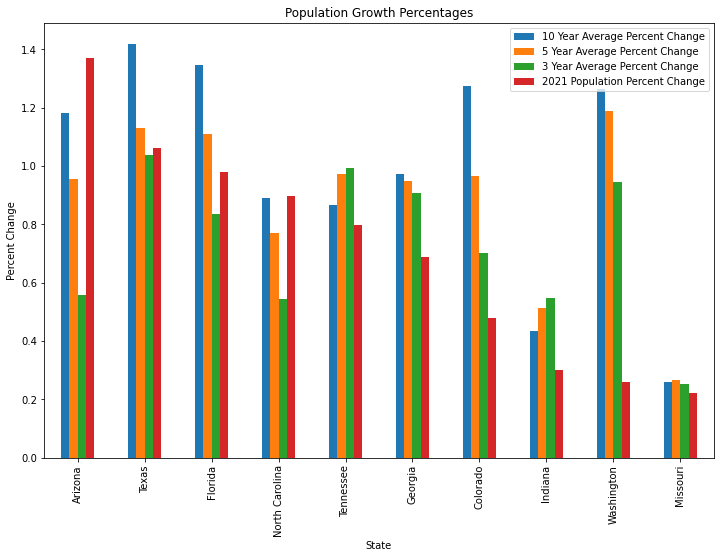

In [48]:
#Plot the percent change data for the above dataframe
high_recent_population_influx.plot(x="State", y=["10 Year Average Percent Change", "5 Year Average Percent Change","3 Year Average Percent Change","2021 Population Percent Change"], kind="bar", figsize=(12, 8), title='Population Growth Percentages', xlabel='State', ylabel='Percent Change')

The above plot shows the long term and short term population percent changes for the top ten highest growth states. Specifically, it displays the 10-year average population percent change, 5-year average population percent change, 3-year average population percent change, and 2021 population percent change.

## Key Takeaways:
- Texas and North Carolina are high on the list, so current Mcadams branches are positioned well.
- Arizona, Texas, Florida, Colorado, and Washington show high spikes in long term population percent changes.
- Five of the ten states are within the South of the United States.
- Florida, Georgia, and Tennessee show high steady population growth and are geographically near current Mcadams branches and resources.

# Market and Competitors Analysis:

Now we will import the datasets related to economies, market size, and competitors.

In [163]:
#Import all the relevant data
gdp_and_industry = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\gdp_and_industry_df.xlsx")
construction_markets_data = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\gdp_and_construction_df.xlsx")
professional_scientific_markets_data = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\gdp_and_scientific_df.xlsx")
construction_proportions_data = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\construction_gdp_proportions_df.xlsx")
professional_scientific_proportions_data = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\scientific_gdp_proportions_df.xlsx")
all_firms_data = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\firms_data.xlsx")
firms_data_5413 = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\number_5413_firms.xlsx")
firms_data_54 = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\number_54_firms.xlsx")
firms_data_23 = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\number_23_firms.xlsx")
big_competitors_5413 = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\total_5413_firms.xlsx")

#Drop unnecessary row
gdp_and_industry.drop('Unnamed: 0', axis=1, inplace=True)
construction_markets_data.drop('Unnamed: 0', axis=1, inplace=True)
professional_scientific_markets_data.drop('Unnamed: 0', axis=1, inplace=True)
construction_proportions_data.drop('Unnamed: 0', axis=1, inplace=True)
professional_scientific_proportions_data.drop('Unnamed: 0', axis=1, inplace=True)
all_firms_data.drop('Unnamed: 0', axis=1, inplace=True)
firms_data_5413.drop('Unnamed: 0', axis=1, inplace=True)
firms_data_54.drop('Unnamed: 0', axis=1, inplace=True)
firms_data_23.drop('Unnamed: 0', axis=1, inplace=True)
big_competitors_5413.drop('Unnamed: 0', axis=1, inplace=True)

## State Economies:

First, we will filter the data to show the top 10 state economies with large and growing GDPs.

In [94]:
#Filter data for large economies and high growth percentages
large = construction_proportions_data['2021 GDP'] >= 325000
large_gdp = construction_proportions_data[large]
state_gdp = large_gdp.filter(['Region','3 Year Average GDP Percent Change','5 Year Average GDP Percent Change'], axis=1)
high_state_gdp_percent_changes = state_gdp.sort_values(['3 Year Average GDP Percent Change','5 Year Average GDP Percent Change'], ascending=[False,False]).head(14)
high_state_gdp_percent_changes.drop([58,56,59,0], axis=0, inplace=True)
high_state_gdp_percent_changes

,Region,3 Year Average GDP Percent Change,5 Year Average GDP Percent Change
48,Washington,3.766667,4.68
3,Arizona,3.400000,3.62
10,Florida,3.133333,3.22
43,Tennessee,3.033333,2.66
6,Colorado,3.000000,3.26
5,California,2.900000,3.48
34,North Carolina,2.666667,2.36
11,Georgia,2.333333,2.64
22,Massachusetts,2.100000,2.36
47,Virginia,1.933333,1.94


The above table is sorting the 3-year average GDP percent change from highest to lowest. The table also includes a long term 5-year average GDP percent change for each state.

## Key Takeaways:
- North Carolina is in the list and Texas is not. North Carolina has a higher short term average percent change than long term, so North Carolina is showing very good growth in its economy.
- Washington has the highest short term and long term averge GDP percent change.
- Five of the ten states are located in the South.

## Construction Markets:

Now, we will filter the data to show the top 10 state economies for construction with large and growing construction industry GDPs.

In [173]:
#Filter data for large construction economies and high growth percentages
large_construction = construction_proportions_data['2021 Industry GDP'] >= 10500
large_construction_gdp = construction_proportions_data[large_construction]
state_construction_gdp = large_construction_gdp.filter(['Region','3 Year Average Industry GDP Percent Change','5 Year Average Industry GDP Percent Change'], axis=1)
high_state_construction_gdp_percent_changes = state_construction_gdp.sort_values(['3 Year Average Industry GDP Percent Change','5 Year Average Industry GDP Percent Change'], ascending=[False,False]).head(13)
high_state_construction_gdp_percent_changes.drop([58,56,55], axis=0, inplace=True)
high_state_construction_gdp_percent_changes

,Region,3 Year Average Industry GDP Percent Change,5 Year Average Industry GDP Percent Change
45,Utah,5.900000,6.06
3,Arizona,5.133333,7.02
34,North Carolina,2.133333,3.10
10,Florida,2.033333,4.32
11,Georgia,2.000000,3.62
26,Missouri,1.866667,2.18
24,Minnesota,1.333333,1.68
15,Indiana,1.266667,2.62
47,Virginia,1.266667,1.34
6,Colorado,0.400000,2.48


The above table is sorting the 3-year construction industry average GDP percent change from highest to lowest. The table also includes a long term 5-year construction industry average GDP percent change for each state.

## Key Takeaways:
- North Carolina is on the list at a very high spot. Texas is not on the list.
- Utah and Arizona have extremely high short term and long term construction industry average GDP percent changes.
- North Carolina, Florida, and Georgia have high long term percent changes.

Next, we will find out which states have the largest construction industry compared to its state GDP. We will find this by dividing the construction industry GDP by the state GDP. We will filter the data for large construction industry GDPs, too.

In [96]:
#Filter data for large construction economies and high industry proportions
large_construction = construction_proportions_data['2021 Industry GDP'] >= 10500
large_construction_gdp = construction_proportions_data[large_construction]
state_construction_gdp = large_construction_gdp.filter(['Region','Last 3 Year Avg Proportion','Last 5 Year Avg Proportion'], axis=1)
high_state_construction_gdp_proportions = state_construction_gdp.sort_values(['Last 3 Year Avg Proportion','Last 5 Year Avg Proportion'], ascending=[False,False]).head(13)
high_state_construction_gdp_proportions.drop([58,56,57], axis=0, inplace=True)
high_state_construction_gdp_proportions

,Region,Last 3 Year Avg Proportion,Last 5 Year Avg Proportion
45,Utah,0.059348,0.058425
21,Maryland,0.049142,0.049813
6,Colorado,0.047652,0.048335
10,Florida,0.046907,0.046652
3,Arizona,0.044315,0.042835
11,Georgia,0.039500,0.039152
24,Minnesota,0.037969,0.038027
15,Indiana,0.037856,0.037623
47,Virginia,0.037661,0.037856
44,Texas,0.037587,0.038623


The above table is sorting the 3-year average construction industry proportion from highest to lowest. The table also includes a long term 5-year average construction industry proportion for each state.

## Key Takeaways:
- Texas is on the list and North Carolina is not.
- Utah has an extremely large proportional construction industry, and it is still growing.

## Professional, Scientific, and Technical Services Markets:

Now, we will filter the data to show the top 10 state economies for Professional, Scientific, and Technical Services with large and growing industry GDPs.

In [93]:
#Filter data for large construction economies and high growth percentages
large_professional = professional_scientific_proportions_data['2021 Industry GDP'] >= 19000
large_professional_gdp = professional_scientific_proportions_data[large_professional]
state_professional_gdp = large_professional_gdp.filter(['Region','3 Year Average Industry GDP Percent Change','5 Year Average Industry GDP Percent Change'], axis=1)
high_state_professional_gdp_percent_changes = state_professional_gdp.sort_values(['3 Year Average Industry GDP Percent Change','5 Year Average Industry GDP Percent Change'], ascending=[False,False]).head(16)
high_state_professional_gdp_percent_changes.drop([58,57,59,52,0,56], axis=0, inplace=True)
high_state_professional_gdp_percent_changes

,Region,3 Year Average Industry GDP Percent Change,5 Year Average Industry GDP Percent Change
22,Massachusetts,8.300000,7.48
48,Washington,7.966667,8.34
6,Colorado,7.733333,7.14
10,Florida,7.566667,6.76
5,California,7.466667,6.92
34,North Carolina,7.266667,7.58
43,Tennessee,6.466667,6.62
44,Texas,5.700000,5.48
3,Arizona,5.166667,5.86
11,Georgia,4.433333,4.48


The above table is sorting the 3-year Professional, Scientific, and Technical Services industry average GDP percent change from highest to lowest. The table also includes a long term 5-year industry average GDP percent change for each state. The Professional, Scientific, and Technical Services industry encompasses a lot of fields. The Professional, Scientific, and Technical Services industry includes: legal advice and representation; accounting, bookkeeping, and payroll services; architectural, engineering, and specialized design services; computer services; consulting services; research services; advertising services; photographic services; translation and interpretation services; veterinary services; and other professional, scientific, and technical services.

## Key Takeaways:
- North Carolina and Texas are on the list.
- Massachusetts, Colorado, Florida, California, and Texas have larger short term average percent changes than long term average percent changes which shows the Professional, Scientific, and Technical Services industry is growing in these states.

Next, we will find out which states have the largest Professional, Scientific, and Technical Services industry compared to its state GDP. We will find this by dividing the Professional, Scientific, and Technical Services industry GDP by the state GDP. We will filter the data for large Professional, Scientific, and Technical Services industry GDPs, too.

In [99]:
#Filter data for large Professional, Scientific, and Technical Services economies and high industry proportions
large_professional = professional_scientific_proportions_data['2021 Industry GDP'] >= 19000
large_professional_gdp = professional_scientific_proportions_data[large_professional]
state_professional_gdp = large_professional_gdp.filter(['Region','Last 3 Year Avg Proportion','Last 5 Year Avg Proportion'], axis=1)
high_state_professional_gdp_proportions = state_professional_gdp.sort_values(['Last 3 Year Avg Proportion','Last 5 Year Avg Proportion'], ascending=[False,False]).head(14)
high_state_professional_gdp_proportions.drop([52,53,59,58], axis=0, inplace=True)
high_state_professional_gdp_proportions

,Region,Last 3 Year Avg Proportion,Last 5 Year Avg Proportion
9,District of Columbia,0.208029,0.208763
22,Massachusetts,0.153689,0.146305
47,Virginia,0.149975,0.147035
21,Maryland,0.115111,0.111003
6,Colorado,0.107839,0.103932
31,New Jersey,0.105643,0.103290
5,California,0.103376,0.099441
33,New York,0.093493,0.092566
14,Illinois,0.091372,0.089702
23,Michigan,0.084214,0.083840


The above table is sorting the 3-year average Professional, Scientific, and Technical Services industry proportion from highest to lowest. The table also includes a long term 5-year average Professional, Scientific, and Technical Services industry proportion for each state.

## Key Takeaways:
- North Carolina and Texas are not on the list.
- District of Columbia has an extremely high Professional, Scientific, and Technical Services industry proportion.

## Construction (NAICS 23) Industry Competitors:

Next, we will use the competitor datasets to draw more insights. Using the state construction industry GDPs and the state construction industry firm numbers, we can see how big of a slice each firm gets of the state construction industry GDP.

In [140]:
#Filter data for large construction economies and high growth percentages
large_construction = construction_proportions_data['2021 Industry GDP'] >= 10500
large_construction_gdp = construction_proportions_data[large_construction]
#Change Column names and merge dataframes
construction_competitors = firms_data_23.rename({'Geographic Area Name':'Region',2017:'2017 Number of Firms', 2018:'2018 Number of Firms', 2019:'2019 Number of Firms', 2020:'2020 Number of Firms'}, axis=1)
state_construction = pd.merge(large_construction_gdp, construction_competitors, on='Region')
#Convert dtypes for 2017 Number of Firms column
state_construction['2017 Number of Firms'] = state_construction['2017 Number of Firms'].astype('str')
state_construction['2017 Number of Firms'] = state_construction['2017 Number of Firms'].str.replace(',', '')
state_construction['2017 Number of Firms'] = pd.to_numeric(state_construction['2017 Number of Firms'], errors='coerce')
#Convert dtypes for 2018 Number of Firms column
state_construction['2018 Number of Firms'] = state_construction['2018 Number of Firms'].astype('str')
state_construction['2018 Number of Firms'] = state_construction['2018 Number of Firms'].str.replace(',', '')
state_construction['2018 Number of Firms'] = pd.to_numeric(state_construction['2018 Number of Firms'], errors='coerce')
#Convert dtypes for 2019 Number of Firms column
state_construction['2019 Number of Firms'] = state_construction['2019 Number of Firms'].astype('str')
state_construction['2019 Number of Firms'] = state_construction['2019 Number of Firms'].str.replace(',', '')
state_construction['2019 Number of Firms'] = pd.to_numeric(state_construction['2019 Number of Firms'], errors='coerce')
#Convert dtypes for 2020 Number of Firms column
state_construction['2020 Number of Firms'] = state_construction['2020 Number of Firms'].astype('str')
state_construction['2020 Number of Firms'] = state_construction['2020 Number of Firms'].str.replace(',', '')
state_construction['2020 Number of Firms'] = pd.to_numeric(state_construction['2020 Number of Firms'], errors='coerce')
#Create function
def gdp_per_firm(col1,col2):
    return (col1/col2)
#Create new computed columns with function
state_construction['2017 Industry GDP per Firm'] = gdp_per_firm(state_construction['2017 Industry GDP'],state_construction['2017 Number of Firms'])    
state_construction['2018 Industry GDP per Firm'] = gdp_per_firm(state_construction['2018 Industry GDP'],state_construction['2018 Number of Firms'])
state_construction['2019 Industry GDP per Firm'] = gdp_per_firm(state_construction['2019 Industry GDP'],state_construction['2019 Number of Firms'])
state_construction['2020 Industry GDP per Firm'] = gdp_per_firm(state_construction['2020 Industry GDP'],state_construction['2020 Number of Firms'])
#Filter for necessary columns and sort values
state_construction_gdp_per_firm = state_construction.filter(['Region','Industry Description','2017 Industry GDP per Firm','2018 Industry GDP per Firm','2019 Industry GDP per Firm','2020 Industry GDP per Firm'], axis=1)
high_state_construction_gdp_per_firm = state_construction_gdp_per_firm.sort_values(['2020 Industry GDP per Firm'], ascending=[False]).head(10)
#View dataframe
high_state_construction_gdp_per_firm

,Region,Industry Description,2017 Industry GDP per Firm,2018 Industry GDP per Firm,2019 Industry GDP per Firm,2020 Industry GDP per Firm
17,Texas,Construction,1.519776,1.439019,1.436114,1.340005
7,Maryland,Construction,1.325719,1.302528,1.285728,1.236117
0,Arizona,Construction,0.969984,1.031248,1.073665,1.114295
4,Georgia,Construction,1.094706,1.122797,1.125205,1.079792
1,California,Construction,1.146259,1.151950,1.146563,1.056950
18,Utah,Construction,0.922518,0.921022,0.920123,0.962716
15,Ohio,Construction,0.976008,0.965234,0.973814,0.937519
19,Virginia,Construction,0.912705,0.903025,0.914115,0.909386
6,Indiana,Construction,0.905254,0.913944,0.931056,0.907586
2,Colorado,Construction,0.871469,0.888955,0.894541,0.866607


The above table is sorting the 2020 Industry GDP per Firm from highest to lowest. The table also includes the figures for 2017, 2018, and 2019. 

## Key Takeaways:
- Texas is on the list in the very top spot. North Carolina is not on the list.
- Arizona is near the top of the list and has a growing construction industry GDP per firm. This means that is could be a good place to acquire a company because there is decreasing competition in the market.

## Professional, Scientific, and Technical Services (NAICS 54) Industry Competitors:

Next, using the state Professional, Scientific, and Technical Services industry GDPs and the state Professional, Scientific, and Technical Services industry firm numbers, we can see how big of a slice each firm gets of the state Professional, Scientific, and Technical Services industry GDP. We will show the top ten results.

In [142]:
#Filter data for large Professional, Scientific, and Technical Services economies and high growth percentages
large_professional = professional_scientific_proportions_data['2021 Industry GDP'] >= 19000
large_professional_gdp = professional_scientific_proportions_data[large_professional]
#Change Column names and merge dataframes
professional_competitors = firms_data_54.rename({'Geographic Area Name':'Region',2017:'2017 Number of Firms', 2018:'2018 Number of Firms', 2019:'2019 Number of Firms', 2020:'2020 Number of Firms'}, axis=1)
state_professional = pd.merge(large_professional_gdp, professional_competitors, on='Region')
#Convert dtypes for 2017 Number of Firms column
state_professional['2017 Number of Firms'] = state_professional['2017 Number of Firms'].astype('str')
state_professional['2017 Number of Firms'] = state_professional['2017 Number of Firms'].str.replace(',', '')
state_professional['2017 Number of Firms'] = pd.to_numeric(state_professional['2017 Number of Firms'], errors='coerce')
#Convert dtypes for 2018 Number of Firms column
state_professional['2018 Number of Firms'] = state_professional['2018 Number of Firms'].astype('str')
state_professional['2018 Number of Firms'] = state_professional['2018 Number of Firms'].str.replace(',', '')
state_professional['2018 Number of Firms'] = pd.to_numeric(state_professional['2018 Number of Firms'], errors='coerce')
#Convert dtypes for 2019 Number of Firms column
state_professional['2019 Number of Firms'] = state_professional['2019 Number of Firms'].astype('str')
state_professional['2019 Number of Firms'] = state_professional['2019 Number of Firms'].str.replace(',', '')
state_professional['2019 Number of Firms'] = pd.to_numeric(state_professional['2019 Number of Firms'], errors='coerce')
#Convert dtypes for 2020 Number of Firms column
state_professional['2020 Number of Firms'] = state_professional['2020 Number of Firms'].astype('str')
state_professional['2020 Number of Firms'] = state_professional['2020 Number of Firms'].str.replace(',', '')
state_professional['2020 Number of Firms'] = pd.to_numeric(state_professional['2020 Number of Firms'], errors='coerce')
#Create function
def gdp_per_firm(col1,col2):
    return (col1/col2)
#Create new computed columns with function
state_professional['2017 Industry GDP per Firm'] = gdp_per_firm(state_professional['2017 Industry GDP'],state_professional['2017 Number of Firms'])    
state_professional['2018 Industry GDP per Firm'] = gdp_per_firm(state_professional['2018 Industry GDP'],state_professional['2018 Number of Firms'])
state_professional['2019 Industry GDP per Firm'] = gdp_per_firm(state_professional['2019 Industry GDP'],state_professional['2019 Number of Firms'])
state_professional['2020 Industry GDP per Firm'] = gdp_per_firm(state_professional['2020 Industry GDP'],state_professional['2020 Number of Firms'])
#Filter for necessary columns and sort values
state_professional_gdp_per_firm = state_professional.filter(['Region','Industry Description','2017 Industry GDP per Firm','2018 Industry GDP per Firm','2019 Industry GDP per Firm','2020 Industry GDP per Firm'], axis=1)
high_state_professional_gdp_per_firm = state_professional_gdp_per_firm.sort_values(['2020 Industry GDP per Firm'], ascending=[False]).head(10)
#View dataframe
high_state_professional_gdp_per_firm

,Region,Industry Description,2017 Industry GDP per Firm,2018 Industry GDP per Firm,2019 Industry GDP per Firm,2020 Industry GDP per Firm
3,District of Columbia,"Professional, scientific, and technical ...",4.365060,4.426027,4.310489,4.221360
8,Massachusetts,"Professional, scientific, and technical ...",2.941274,3.142137,3.357663,3.554313
19,Virginia,"Professional, scientific, and technical ...",2.081154,2.223831,2.273231,2.282362
13,New York,"Professional, scientific, and technical ...",2.100061,2.142725,2.211688,2.155153
1,California,"Professional, scientific, and technical ...",1.829963,1.934305,2.018018,2.010610
12,New Jersey,"Professional, scientific, and technical ...",1.838572,1.937681,2.002937,2.000836
7,Maryland,"Professional, scientific, and technical ...",1.785042,1.892262,1.964547,1.905395
16,Pennsylvania,"Professional, scientific, and technical ...",1.737161,1.803235,1.879311,1.816901
17,Tennessee,"Professional, scientific, and technical ...",1.558795,1.707720,1.809090,1.798702
6,Illinois,"Professional, scientific, and technical ...",1.668224,1.768209,1.802841,1.752154


The above table is sorting the 2020 Industry GDP per Firm from highest to lowest. The table also includes the figures for 2017, 2018, and 2019. 

## Key Takeaways:
- Texas and North Carolina are not on the list.
- The District of Columbia is a great place for a firm in this industry because they have the potential to earn very steady and large portion of the industry's GDP.
- Massachusetts is showing high growth in this calculation.

## Architectural, engineering and related services (NAICS 5413) Industry Competitors:

This is the narrow and specific industry that Mcadams is within. The dataset for this industry will show the closest competitors to Mcadams. The data is filtered to show only firms with more than 100 employees to show the closest competitors to Mcadams. This allows Mcadams to make more precise decisions from the data. 

Next, using the dataset for states with large populations and the state Architectural, engineering and related services industry firm numbers, we can see which states have the most need for more Architectural, engineering and related services firms.

In [164]:
#Change Column names and merge dataframes
large_5413_firms = big_competitors_5413.rename({'Geographic Area Name':'Region'}, axis=1)
large_population.rename({'State':'Region'}, axis=1, inplace=True)
population_and_number_of_firms_5413 = pd.merge(large_population, large_5413_firms, on='Region')

#Create function
def population_per_firm(col1,col2):
    return (col1/col2)
#Create new computed columns with function
population_and_number_of_firms_5413['2017 Population per 5413 Firm with 100+ employees'] = population_per_firm(population_and_number_of_firms_5413['2017 Population'],population_and_number_of_firms_5413['2017 Number of Firms'])    
population_and_number_of_firms_5413['2018 Population per 5413 Firm with 100+ employees'] = population_per_firm(population_and_number_of_firms_5413['2018 Population'],population_and_number_of_firms_5413['2018 Number of Firms'])
population_and_number_of_firms_5413['2019 Population per 5413 Firm with 100+ employees'] = population_per_firm(population_and_number_of_firms_5413['2019 Population'],population_and_number_of_firms_5413['2019 Number of Firms'])
population_and_number_of_firms_5413['2020 Population per 5413 Firm with 100+ employees'] = population_per_firm(population_and_number_of_firms_5413['2020 Population'],population_and_number_of_firms_5413['2020 Number of Firms'])
#Filter for necessary columns and sort values
state_population_per_large_firm = population_and_number_of_firms_5413.filter(['Region','2017 NAICS code','2017 Population per 5413 Firm with 100+ employees','2018 Population per 5413 Firm with 100+ employees','2019 Population per 5413 Firm with 100+ employees','2020 Population per 5413 Firm with 100+ employees'], axis=1)
best_state_population_per_large_firm = state_population_per_large_firm.sort_values(['2020 Population per 5413 Firm with 100+ employees'], ascending=[False]).head(10)
#View dataframe
best_state_population_per_large_firm

,Region,2017 Population per 5413 Firm with 100+ employees,2018 Population per 5413 Firm with 100+ employees,2019 Population per 5413 Firm with 100+ employees,2020 Population per 5413 Firm with 100+ employees
17,Tennessee,216412.870968,250801.148148,341458.700000,266158.423077
6,Indiana,256079.923077,239124.892857,292705.173913,226188.133333
11,Missouri,210574.827586,204054.100000,204580.933333,212223.482759
3,Florida,205525.617647,191390.243243,191765.508929,194323.711712
0,Arizona,234800.266667,198834.000000,186633.769231,184050.923077
13,New York,184807.283019,187791.836538,172155.407080,179954.758929
21,Wisconsin,214451.333333,232296.240000,181951.062500,168352.085714
14,North Carolina,197466.019231,173026.916667,158910.363636,163393.390625
4,Georgia,189278.727273,210222.620000,171248.758065,157732.352941
12,New Jersey,145664.344262,155895.175439,148036.500000,157283.779661


The above table is sorting the "2020 Population per 5413 Firm with 100+ employees" column from highest to lowest. The table also includes the figures for 2017, 2018, and 2019. 

## Key Takeaways:
- North Carolina is on the list and Texas is not.
- Tennessee is at the top spot, which indicates that there are fewer competitors for Mcadams in this state.

# US News Analysis:

US News analyzes United States Census Bureau data and releases state rankings on a variety of fields. We will analyze these rankings.

## Best State:

First, we will look at their "Best State to Live In" ranking. This matters to Mcadams because we want our employees to be happy because their happiness shows in the quality of their work. Also, if an employee is happy with their life and where they live, Mcadams will be able to retain their talent much longer and lower quality employee turnover.

In [208]:
#Import data
best_state_data = pd.read_csv(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\us news data\states_data.csv")
best_states = best_state_data.head(10)
best_states

,Rank,State,Health Care,Education,Economy,Infrastructure,Opportunity,Fiscal Stability,Crime & Corrections,Natural Environment
0,1,Washington,8,4,4,3,25,6,19,15
1,2,Minnesota,16,17,15,9,2,21,15,10
2,3,Utah,11,10,1,5,30,5,8,47
3,4,New Hampshire,13,13,11,34,3,33,1,2
4,5,Idaho,24,29,3,10,24,4,10,12
5,6,Nebraska,28,9,20,6,10,17,31,6
6,7,Virginia,12,12,13,39,8,18,9,19
7,8,Wisconsin,15,8,26,24,9,9,25,17
8,9,Massachusetts,2,2,5,42,36,43,4,4
9,10,Florida,25,3,8,20,33,8,26,18


The above table shows the 2021 US News rankings for the best state. The data used is the most recent data available for each category. US News weights each category a certain amount, but the weights are close to even, but not even.

## Key Takeaways:
- North Carolina and Texas are not on the list.
- Washington is in the top spot with very good scores in education, economy, and infrastructure.

## Infrastructure Gap:

Next, we will make a calculation to see which states have the biggest gap between economy and infrastructure scores. A state with a good economy, but poor infrastructure score could be a good target location for Mcadams because the state has the means to provide funding to improve its infrastructure.

In [149]:
#Create function
def infrastructure_gap(col1,col2):
    return (col1-col2)
#Create new computed column with function
best_state_data['Infrastructure Gap'] = infrastructure_gap(best_state_data['Economy'],best_state_data['Infrastructure'])
#Filter and sort the values
infrastructure_gap_ranking = best_state_data.filter(['State','Economy','Infrastructure','Infrastructure Gap'], axis=1)
big_infrastructure_gap_ranking = infrastructure_gap_ranking.sort_values(['Infrastructure Gap'], ascending=[True]).head(10)
#View the top ten
big_infrastructure_gap_ranking

,State,Economy,Infrastructure,Infrastructure Gap
8,Massachusetts,5,42,-37
6,Virginia,13,39,-26
19,Connecticut,22,46,-24
3,New Hampshire,11,34,-23
23,California,10,31,-21
33,Rhode Island,28,49,-21
41,South Carolina,18,36,-18
38,Arizona,7,23,-16
15,Colorado,2,15,-13
9,Florida,8,20,-12


The above table shows the states with the largest infrastructure gap compared to their economy.

## Key Takeaways:
- North Carolina and Texas are not on the list.
- Massachusetts has an extremely large gap.
- There are many very successful economies like Arizona, Colorado, and Florida that have large infrastructure gaps.

## Energy Infrastructure Gap:

Now, we will drill down deeper into the factors that make the US News' infrastructure rankings. Large and growing economies require energy to live and make products. The world's infrastructure is slowly shifting to an entirely electric system to mitigate the climate crisis. To achieve this goal, there is a growing need for more electric energy infrastructure. Next, we will find states with the largest economy to energy infrastructure gaps. 

In [155]:
#Import data
energy_infrastructure_data = pd.read_csv(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\us news data\states_infrastructure_energy_data.csv")
#Merge column to dataframe
best_energy_state_data = pd.merge(best_state_data,energy_infrastructure_data[['State','Rank']],on='State', how='left')
#Rename columns
best_energy_state_data.rename({'Rank_y':'Energy Infrastructure'}, axis=1, inplace=True)
#Create function
def energy_infrastructure_gap(col1,col2):
    return (col1-col2)
#Create new computed column with function
best_energy_state_data['Energy Infrastructure Gap'] = energy_infrastructure_gap(best_energy_state_data['Economy'],best_energy_state_data['Energy Infrastructure'])
#Filter and sort the values
energy_infrastructure_gap_ranking = best_energy_state_data.filter(['State','Economy','Energy Infrastructure','Energy Infrastructure Gap'], axis=1)
big_energy_infrastructure_gap_ranking = energy_infrastructure_gap_ranking.sort_values(['Energy Infrastructure Gap'], ascending=[True]).head(10)
#View the top ten
big_energy_infrastructure_gap_ranking

,State,Economy,Energy Infrastructure,Energy Infrastructure Gap
8,Massachusetts,5,46,-41
3,New Hampshire,11,44,-33
23,California,10,39,-29
19,Connecticut,22,48,-26
6,Virginia,13,38,-25
2,Utah,1,22,-21
33,Rhode Island,28,45,-17
28,Tennessee,16,32,-16
30,Texas,9,25,-16
9,Florida,8,23,-15


The above table shows the states with the largest energy infrastructure gap compared to their economy.

## Key Takeaways:
- Texas is on the list and North Carolina is not.
- Massachusetts has an extremely large gap.
- California has the largest economy in the United States and a very large gap.

## Power Grid Infrastructure Gap:

Next, we will drill down depper into the factors that make the energy infrastructure rankings. Specifically, we will be looking at the Power Grid Reliability scores. For the entire country to be converted to an electric energy system, the power grid must be updated. There must be a nationwide powergrid that works together (for sending power generated one place to other places), instead of smaller seperate power grids. Also, the electric service to each household will need to be upgraded. Many streets will need to be dug up to install heavier wires, transformers, and other electric equipment. Currently, Mcadams has very few projects that are energy related. Mcadams needs to diversify their project types for mitigating risk and establishing new revenue streams for future growth. Targeting good state economies with poor power grids could be the perfect way for Mcadams to enter more energy projects. 

In [157]:
#Merge column to dataframe
energy_state_data = pd.merge(best_state_data,energy_infrastructure_data[['State','Power Grid Reliability']],on='State', how='left')
#Create function
def power_grid_infrastructure_gap(col1,col2):
    return (col1-col2)
#Create new computed column with function
energy_state_data['Power Grid Infrastructure Gap'] = power_grid_infrastructure_gap(energy_state_data['Economy'],energy_state_data['Power Grid Reliability'])
#Filter and sort the values
power_grid_infrastructure_gap_ranking = energy_state_data.filter(['State','Economy','Power Grid Reliability','Power Grid Infrastructure Gap'], axis=1)
big_power_grid_infrastructure_gap_ranking = power_grid_infrastructure_gap_ranking.sort_values(['Power Grid Infrastructure Gap'], ascending=[True]).head(10)
#View the top ten
big_power_grid_infrastructure_gap_ranking

,State,Economy,Power Grid Reliability,Power Grid Infrastructure Gap
3,New Hampshire,11,49,-38
4,Idaho,3,36,-33
6,Virginia,13,42,-29
28,Tennessee,16,41,-25
2,Utah,1,24,-23
19,Connecticut,22,43,-21
30,Texas,9,29,-20
17,Georgia,12,32,-20
12,North Carolina,17,35,-18
31,Indiana,21,37,-16


The above table shows the states with the largest power grid infrastructure gap compared to their economy.

## Key Takeaways:
- Texas and North Carolina are on the list.
- Five of the ten states are in the South.

## Higher Education:

Next, we will look at the higher education rankings for each state. The Zweig Groups' 5-year Strategic Plan for Mcadams showed how necessary it is for Mcadams to search for qualified and skilled young talent. This will be a priority for any new acquisition to make sure the branch flourishes.

In [209]:
#Import data
best_state_higher_education_data = pd.read_csv(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\us news data\states_education_higher_education_data.csv")
high_education_states = best_state_higher_education_data.head(10)
high_education_states

,Rank,State,2-Year College Graduation Rate,4-Year College Graduation Rate,Low Debt at Graduation,Educational Attainment,Tuition and Fees
0,1,Florida,2.0,6,7,29,1
1,2,Washington,8.0,8,8,10,7
2,3,California,12.0,5,4,22,14
3,4,Wyoming,5.0,24,5,31,2
4,5,Colorado,4.0,25,15,2,27
5,6,Utah,26.0,47,1,12,4
6,7,North Carolina,23.0,11,16,23,8
7,8,South Dakota,1.0,39,40,25,23
8,9,Nevada,NaN,41,3,44,3
9,10,Nebraska,13.0,31,14,14,19


The above table shows the states with the best higher education scores.

## Key Takeaways:
- North Carolina is on the list and Texas is not.
- Florida is in the top spot.

## Business Environment:

Next, we will look at the rankings for each state's business environment. It will be beneficial for a Mcadams acquistion to be located in a state with a good business environment.

In [210]:
#Import data
best_business_environment_data = pd.read_csv(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\us news data\states_economy_business_environment_data.csv")
business_environment_states = best_business_environment_data.head(10)
business_environment_states

,Rank,State,Business Creation Rate,Patent Creation Rate,Low Tax Burden,Top Company Headquarters,Venture Capital
0,1,Massachusetts,23,1,25,5,1
1,2,California,9,2,37,17,2
2,3,Washington,10,3,21,30,5
3,4,Colorado,8,10,19,11,4
4,5,Idaho,1,14,17,27,28
5,6,Delaware,11,26,30,3,12
6,7,Connecticut,43,6,43,1,14
7,8,Utah,2,11,22,39,7
8,9,Georgia,7,29,8,16,10
9,10,Rhode Island,15,19,40,2,32


The above table shows the states with the best business environment scores.

## Key Takeaways:
- North Carolina and Texas are not on the list.
- Out of the top ten, Georgia has the lowest tax burden.

## Fiscal Stability:

Next, we will look at the fiscal stability rankings of the state governments. Currently, Mcadams' project portfolio is heavily invested in Real Estate projects, so finding more government projects could help balance the portfolio's risk.

In [211]:
#Import data
best_fiscal_stability_data = pd.read_csv(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\us news data\states_fiscal_stability_data.csv")
fiscal_stability_states = best_fiscal_stability_data.head(10)
fiscal_stability_states

,Rank,State,Long-Term,Short-Term
0,1,Alaska,41,1
1,2,South Dakota,3,5
2,3,Tennessee,1,11
3,4,Idaho,6,7
4,5,Utah,7,8
5,6,Washington,2,19
6,7,North Carolina,5,16
7,8,Florida,11,9
8,9,Wisconsin,4,34
9,10,Texas,19,6


The above table shows the states with the best fiscal stability scores.

## Key Takeaways:
- North Carolina and Texas are on the list.
- Tennessee has the best long term fiscal stability ranking.
- Alaska has the best short term fiscal stability ranking.

# ASCE Infrastructure Analysis:

The American Society of Civil Engineers releases reports detailing the quality of specific infrastructure in eash state. We will analyze the scores to find advantageous infrastructure locations for Mcadams. 

Specifically, we will be looking closely at water infrastructure and energy infrastructure scores. Mcadams has a large amount of water projects completed, so Mcadams could leverage this experience to gain market share of water projects in new locations. Water is a fundamental building block of an economy, but good water resources are a growing worry for states due to contamination, droughts, flooding, and aging infrastructure. This is a problem that Mcadams can help solve while growing the company. Also, we will research energy infrastructure scores because Mcadams has few energy related projects and needs to expand opportunities in this area. Mcadams must take advantage of the shift to electrification of the world's infrastructure to achieve its high growth goals.

Unfortunately, North Carolina does not have an Infrastructure Report Card from the ASCE, so we will not be able to compare any scores to North Carolina.

## Water Infrastructure Opportunities:

In [247]:
#Import data
asce_data = pd.read_csv(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\state_infrastructure_report_card_data.csv")
#filter data for big competitiors
water_infrastructure = ['Drinking Water','Stormwater','Wastewater/Storm Water','StormWater','Wastewater','Levees','Dams']
water_grades = ['D+','D','D-']
asce_data_filtered = asce_data[asce_data["Infrastructure"].isin(water_infrastructure)]
asce_data_water = asce_data_filtered[asce_data_filtered["Grade"].isin(water_grades)]
#Change Column names and merge dataframes
asce_data_water_1 = asce_data_water.rename({'State':'Region'}, axis=1)
population_and_asce_water = pd.merge(large_population, asce_data_water_1, on='Region')
population_and_asce_water_data = population_and_asce_water.filter(['Region','Infrastructure','Grade'], axis=1)
population_and_asce_water_data

,Region,Infrastructure,Grade
0,California,Levees,D
1,California,Stormwater,D+
2,Colorado,Levees,D+
3,Florida,Dams,D-
4,Florida,Levees,D+
5,Georgia,Dams,D
6,Georgia,Wastewater,D+
7,Illinois,Drinking Water,D+
8,Illinois,Stormwater,D+
9,Michigan,Drinking Water,D


The above table is filtered to show which states have large populations and poor water infrastructure scores.

## Key Takeaways:
- Texas and Pennsylvania have poor scores in 3 water-related infrastructure types.
- Infrastructure for storm water and levies have the most poor ratings.

Next, we will look for location opportunities in the energy infrastructure scores. Previously, we analyzed energy infrastructure data in the US News data and compared the scores to the state's economy score. This time we will use the ASCE energy infrastructure rating and filter for states with large populations.

## Energy Infrastructure Opportunities:

In [171]:
#Import data
asce_data = pd.read_csv(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\state_infrastructure_report_card_data.csv")
#filter data for big competitiors
energy_infrastructure = ['Energy']
energy_grades = ['D+','D','D-']
asce_data_filtered_energy = asce_data[asce_data["Infrastructure"].isin(energy_infrastructure)]
asce_data_energy = asce_data_filtered_energy[asce_data_filtered_energy["Grade"].isin(energy_grades)]
#Change Column names and merge dataframes
asce_data_energy_1 = asce_data_energy.rename({'State':'Region'}, axis=1)
population_and_asce_energy = pd.merge(large_population, asce_data_energy_1, on='Region')
population_and_asce_energy_data = population_and_asce_energy.filter(['Region','Infrastructure','Grade'], axis=1)
population_and_asce_energy_data

,Region,Infrastructure,Grade
0,California,Energy,D-
1,Missouri,Energy,D+


The above table is filtered to show which states have large populations and poor energy infrastructure scores, according to the ASCE.

## Key Takeaways:
- California and Missouri are the only states on the list, with California having the worst score and nearly failing.
- California is the largest economy with the biggest population in the United States. One can make the assumption that a lot of work will need to be done to convert California's power infrastructure to completely electric.

# Climate Risk Analysis:

Next, we will find which places have the highest and lowest risk of a natural hazard. As climate change worsens, natural disasters occur more frequently, so understanding the climate risks involved for an acquistion location is very necessary.

If a location has a high risk, then it may cause more people to leave that place to live somewhere else in the long term. Also, it could spur serious infrastructure investment in the short term to try and combat the climate effects. So, it could be seen as a double-edged sword.

On the other hand, if a location has a low risk of a natural hazard, more people might move there in the future to escape places that are heavily affected by climate change.

## High Risk of Natural Disasters:

In [186]:
#Import data
climate_risk_data = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Mcadams Projects\Best Locations\data\climate_risk_scores.xlsx")
climate_risk_data.drop('Unnamed: 0', axis=1, inplace=True)
#Count of each value in column
climate_risk_data['RISK_RATNG'].value_counts()

Very Low               1259
Relatively Low         1215
Relatively Moderate     518
Relatively High         129
Very High                21
Name: RISK_RATNG, dtype: int64

There are only 150 counties with a risk rating of "Very High" or "Relatively High".

,STATE,COUNTY,RISK_SCORE
0,California,Los Angeles,100.000000
1,Texas,Harris,80.618536
2,Florida,Miami-Dade,63.926384
3,California,Riverside,58.865953
4,New York,Bronx,55.547136
5,California,San Bernardino,54.404233
6,Florida,Palm Beach,53.711650
7,Texas,Cameron,50.793963
8,New York,Kings,50.483742
9,Louisiana,Orleans,49.299052


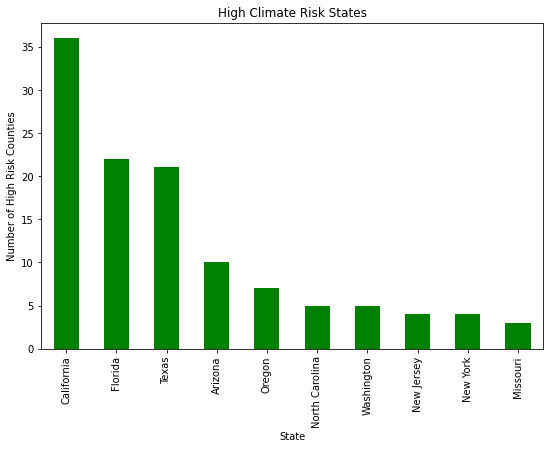

In [257]:
#Filter data
climate_rating = ['Very High','Relatively High']
climate_risk_data_filtered = climate_risk_data[climate_risk_data["RISK_RATNG"].isin(climate_rating)]
#Count of each state in column
states_with_high_climate_risk = climate_risk_data_filtered['STATE'].value_counts().head(10)
#Plot the percent change data for the above dataframe
states_with_high_climate_risk.plot(x="State", kind="bar", color='green', figsize=(9, 6), title='High Climate Risk States', xlabel='State', ylabel='Number of High Risk Counties')
#Top 10 at-risk counties
climate_risk_data.filter(['STATE','COUNTY','RISK_SCORE'], axis=1).head(10)

The table above shows the top ten highest risk counties. The graph above shows the top ten highest risk states for a climate hazard.

## Key Takeaways:
- Texas and North Carolina are on the list.
- California, Florida, Texas, and Arizona have high risk scores.
- The states with the highest risk scores also have very high populations and GDPs. This most likely means that these state economies will spend significant money on infrastructure to combat climate impacts.

The above states have the highest risk of a natural disaster, so people might leave these places in the long term, but since these states have big populations and economies, they will most likely invest significant money in climate-proof infrastructure in the short term.

## Low Risk of Natural Disasters:

In [194]:
#Count of each value in column
climate_risk_data['RISK_RATNG'].value_counts()

Very Low               1259
Relatively Low         1215
Relatively Moderate     518
Relatively High         129
Very High                21
Name: RISK_RATNG, dtype: int64

There are 1259 counties with a "Very Low" risk rating.

,STATE,COUNTY,RISK_SCORE
3141,Virginia,Loudoun,0.000000
3140,Texas,Loving,0.004606
3139,Georgia,Chattahoochee,0.009269
3138,Colorado,Douglas,0.341317
3137,Virginia,Falls Church,0.586229
3136,North Dakota,Slope,0.679850
3135,Louisiana,West Feliciana,0.706315
3134,Illinois,Brown,0.721142
3133,Georgia,Wheeler,0.848989
3132,Virginia,Arlington,1.044901


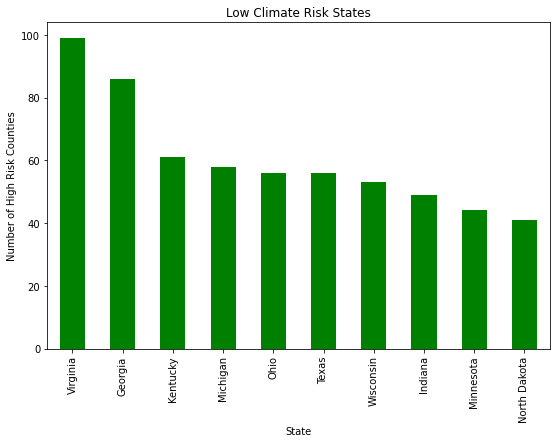

In [207]:
#Filter data
low_climate_rating = ['Very Low']
low_climate_risk_data_filtered = climate_risk_data[climate_risk_data["RISK_RATNG"].isin(low_climate_rating)]
#Count of each state in column
states_with_low_climate_risk = low_climate_risk_data_filtered['STATE'].value_counts().head(10)
#Plot the percent change data for the above dataframe
states_with_low_climate_risk.plot(x="State", kind="bar", color='green', figsize=(9, 6), title='Low Climate Risk States', xlabel='State', ylabel='Number of High Risk Counties')
#Top 10 lowest risk counties
risk_data = climate_risk_data.filter(['STATE','COUNTY','RISK_SCORE'], axis=1)
low_risk = risk_data.sort_values(['RISK_SCORE'], ascending = [True]).head(10)
low_risk

The table above shows the top ten lowest risk counties. The graph above shows the top ten lowest risk states for a climate hazard.

## Key Takeaways:
- Texas is on the list because Texas has a lot of counties.
- Virginia and Georgia have very low risk scores. Plus, large populations and GDPs.
- Many states with low risk scores are near the border with Cananda or the Midwest region.

The above states have the lowest risk of a natural disaster, so as climate change increases, these states could see a rise in population and GDP in the long term.

# Conclusion:

Now, we will combine all dataframes/graphs above to see which states were mentioned the most. The states that appeared the most in the assessment are the best locations to acquire a firm. All the computations will be weighted the same in this process, but management might find some computed tables to be more important than others when choosing an acquisition location.

,State,Count
0,Florida,13
1,California,12
2,Georgia,11
3,Colorado,11
4,Virginia,11
5,Texas,10
6,Arizona,9
7,North Carolina,9
8,Utah,9
9,Washington,9


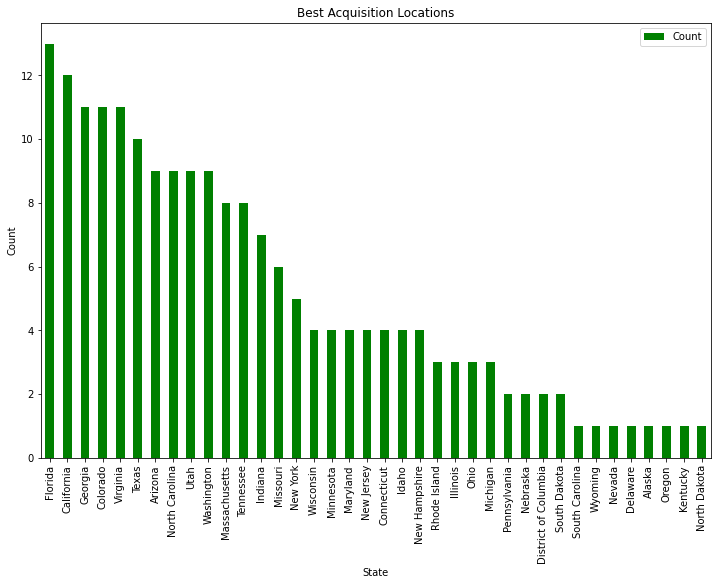

In [271]:
#Rename column names in dataframes and series to match
high_recent_population_influx.rename({'Region':'State'}, axis=1, inplace=True)
high_state_gdp_percent_changes.rename({'Region':'State'}, axis=1, inplace=True)
high_state_construction_gdp_percent_changes.rename({'Region':'State'}, axis=1, inplace=True)
high_state_construction_gdp_proportions.rename({'Region':'State'}, axis=1, inplace=True)
high_state_professional_gdp_percent_changes.rename({'Region':'State'}, axis=1, inplace=True)
high_state_professional_gdp_proportions.rename({'Region':'State'}, axis=1, inplace=True)
high_state_construction_gdp_per_firm.rename({'Region':'State'}, axis=1, inplace=True)
high_state_professional_gdp_per_firm.rename({'Region':'State'}, axis=1, inplace=True)
best_state_population_per_large_firm.rename({'Region':'State'}, axis=1, inplace=True)
population_and_asce_water_data.rename({'Region':'State'}, axis=1, inplace=True)
pop = population_and_asce_water_data['State'].value_counts()
pop_and_asce_water = pd.DataFrame(pop).reset_index().rename({'index':'State','State':'Count'}, axis=1)
population_and_asce_energy_data.rename({'Region':'State'}, axis=1, inplace=True)
states_high = pd.DataFrame(states_with_high_climate_risk).reset_index().rename({'index':'State','STATE':'Count'}, axis=1)
states_low = pd.DataFrame(states_with_low_climate_risk).reset_index().rename({'index':'State','STATE':'Count'}, axis=1)
#Combine all dataframes
combined_df = pd.concat([high_recent_population_influx['State'],high_state_gdp_percent_changes['State'],high_state_construction_gdp_percent_changes['State'],high_state_construction_gdp_proportions['State'],high_state_professional_gdp_percent_changes['State'],high_state_professional_gdp_proportions['State'],
                          high_state_construction_gdp_per_firm['State'],high_state_professional_gdp_per_firm['State'],best_state_population_per_large_firm['State'],best_states['State'],big_infrastructure_gap_ranking['State'],big_energy_infrastructure_gap_ranking['State'],
                          big_power_grid_infrastructure_gap_ranking['State'],high_education_states['State'],business_environment_states['State'],fiscal_stability_states['State'],states_high['State'],states_low['State'],pop_and_asce_water['State'],population_and_asce_energy_data['State']], axis=0, keys=['Large Populations with High Population Growth','Large Economies with High GDP Growth','Large Construction Economies with High Construction GDP Growth','Large Construction Economies with High Construction GDP to State GDP Proportions','Large NAICS 54 Economies with High NAICS 54 Industry GDP Growth','Large NAICS 54 Economies with High NAICS 54 GDP to State GDP Proportions',
                          'Large Construction Economies with High Construction GDP per Firm','Large NAICS 54 Economies with High NAICS 54 GDP per Firm','Large Populations with High Population per Large NAICS 5413 Firm','US News Best State Ranking','States with Largest Infrastructure Gap with US News Data','States with Largest Energy Infrastructure Gap with US News Data',
                          'States with Largest Power Grid Infrastructure Gap with US News Data','Top US News Higher Education Rankings','Top US News Business Environment Rankings','Top US News Fiscal Stability Rankings','States with Highest Climate Risk','States with Lowest Climate Risk','Largest Populations with Poorest ASCE Water Infrastructure Scores','Largest Populations with Worst Energy Infrastructure Scores']).reset_index()
combined_data = pd.DataFrame(combined_df).rename({'level_0':'Table Name'}, axis=1).drop('level_1',axis=1)
#Count the number of each state in the combined dataframe
acquisition_locations = combined_data['State'].value_counts()
best_acquisition_locations = pd.DataFrame(acquisition_locations).reset_index().rename({'index':'State','State':'Count'}, axis=1)
#Plot data
best_acquisition_locations.plot(x="State", kind="bar", color='green', figsize=(12, 8), title='Best Acquisition Locations', xlabel='State', ylabel='Count')
#top 12
top_12 = best_acquisition_locations.head(12)
top_12

The table above shows the top twelve (including Texas and North Carolina) states for a new acquisition. The graph above shows the total number of times a state was mentioned in the combined computational dataframe.

## Key Takeaways:
- Texas and North Carolina are high on the list.
- The majority of the top states are in the South and West of the United States.

## Recommendation:

Expanding to Florida or Georgia would be the best decision for Mcadams. It would allow for Mcadams to become a regional powerhouse in one of the fastest growing regions in the United States. Plus, it will bridge together Mcadams' current branches and not spread the company's assets too thin, geographically.

## Next Steps:
- Look for acquisition targets in the top mentioned states.
- Look for acquisition targets with good background in energy infrastructure to enhance Mcadams' energy project portfolio.
- Do analysis on the overall real estate market and acquistion market to see if it is a good time to acquire a new firm.